In [3]:
from ctgan import CTGAN
import pandas as pd

# Sample data
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'label': ['A', 'B', 'A', 'B', 'A']
})

# Define categorical columns
discrete_columns = ['label']

# Initialize CTGAN
ctgan = CTGAN()

# Train the model on the data
ctgan.fit(data, discrete_columns)

# Condition on the 'label' column with value 'A'
condition_column = 'label'
condition_value = 'A'

# Generate synthetic data conditioned on 'label' == 'A'
synthetic_data = ctgan.sample(100, condition_column=condition_column, condition_value=condition_value)

# Print the synthetic data
print(synthetic_data)


    feature1  feature2 label
0          2         2     A
1          2         0     A
2          3         1     B
3          0         2     B
4          4         2     A
..       ...       ...   ...
95         3         0     B
96         2         1     A
97         0         0     A
98         2         1     A
99         1         2     A

[100 rows x 3 columns]


In [5]:
synthetic_data['label'].value_counts()

A    62
B    38
Name: label, dtype: int64

In [1]:
import pandas as pd
import numpy as np

num_patients = 100

# Categorical columns
categorical_data = np.random.randint(0, 4, size=(num_patients, 7)) # 3 categories
categorical_columns = [f'categorical_feature_{i}' for i in range(1, 8)]

# Binary columns
binary_data = np.random.randint(0, 2, size=(num_patients, 9))
binary_columns = [f'binary_feature_{i}' for i in range(1, 10)]

# Integer columns
integer_data = np.random.randint(0, 100, size=(num_patients, 2)) # integers 0~99
integer_columns = [f'integer_feature_{i}' for i in range(1, 3)]

# Float columns
float_data = np.random.rand(num_patients, 4) # floats 0.0~1.0
float_columns = [f'float_feature_{i}' for i in range(1, 5)]


clinical_data = np.hstack((categorical_data, binary_data, integer_data, float_data))
columns = categorical_columns + binary_columns + integer_columns + float_columns

# Convert to DataFrame
clinical_df = pd.DataFrame(clinical_data, columns=columns)
discrete_columns = categorical_columns + binary_columns

clinical_df.head()

,categorical_feature_1,categorical_feature_2,categorical_feature_3,categorical_feature_4,categorical_feature_5,categorical_feature_6,categorical_feature_7,binary_feature_1,binary_feature_2,binary_feature_3,...,binary_feature_6,binary_feature_7,binary_feature_8,binary_feature_9,integer_feature_1,integer_feature_2,float_feature_1,float_feature_2,float_feature_3,float_feature_4
0,2.0,0.0,3.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,22.0,89.0,0.468662,0.874931,0.613003,0.630160
1,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,79.0,81.0,0.764925,0.094895,0.825616,0.943886
2,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,53.0,12.0,0.762520,0.469688,0.868073,0.038290
3,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,23.0,56.0,0.562972,0.778332,0.886417,0.842121
4,0.0,0.0,3.0,1.0,0.0,3.0,3.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,58.0,3.0,0.262222,0.213578,0.996537,0.600825


In [2]:
discrete_columns

['categorical_feature_1',
 'categorical_feature_2',
 'categorical_feature_3',
 'categorical_feature_4',
 'categorical_feature_5',
 'categorical_feature_6',
 'categorical_feature_7',
 'binary_feature_1',
 'binary_feature_2',
 'binary_feature_3',
 'binary_feature_4',
 'binary_feature_5',
 'binary_feature_6',
 'binary_feature_7',
 'binary_feature_8',
 'binary_feature_9']

In [3]:
len(discrete_columns)

16

In [4]:
clinical_df.to_csv('./utils/data/clinical_data.csv', index=False)

(100, 256, 256, 256)


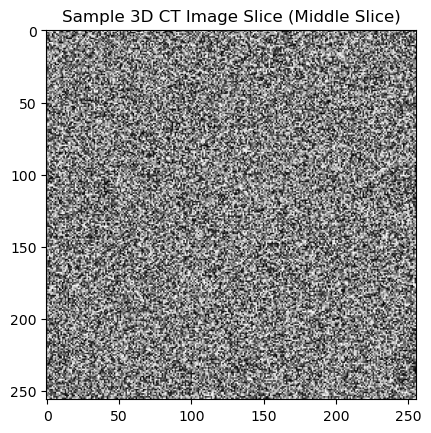

In [5]:
# Random generation
ct_image_shape = (256, 256, 256)
ct_images = np.random.rand(num_patients, *ct_image_shape).astype(np.float32)

print(ct_images.shape)  # (1018, 256, 256, 256)

# Visualization
import matplotlib.pyplot as plt

plt.imshow(ct_images[0, :, :, 128], cmap='gray')
plt.title('Sample 3D CT Image Slice (Middle Slice)')
plt.show()

In [6]:
np.save('./utils/data/ct_images.npy', ct_images)

In [8]:
ct_images = np.load('./utils/data/ct_images.npy')

In [9]:
ct_images.shape

(100, 256, 256, 256)